<a href="https://colab.research.google.com/github/GILLYBOEUF/VideoPose3D/blob/main/Detectron2_Tutorial_video_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detectron2 Tutorial

<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">



https://github.com/facebookresearch/detectron2

>[Detectron2 Tutorial](#scrollTo=QHnVupBBn9eR)

>>[Inference for video](#scrollTo=hiXadAb9Fv-L)

>>[Let's make it work with Google Colab](#scrollTo=gdnPMrMPG02n)

>>[In case of problems - uncomment and run this part](#scrollTo=tg3X3HkSvxlF)

>>[Install Detectron2](#scrollTo=okYuWS33v-7c)

>>[COCO Person Keypoint Detection](#scrollTo=OpBoVm3T9Mrp)

>>>[Choose a model for the inference](#scrollTo=eEEMzf1a9Ath)

>>>[Run the inference](#scrollTo=pnviiJuG8mxo)

>>[Output example](#scrollTo=FKXz-oXIYgUv)



!Note: detectron2 at the moment doesn't work with torch 1.8, you need to downgrade torch to 1.7

## Inference for video

We will be using this one

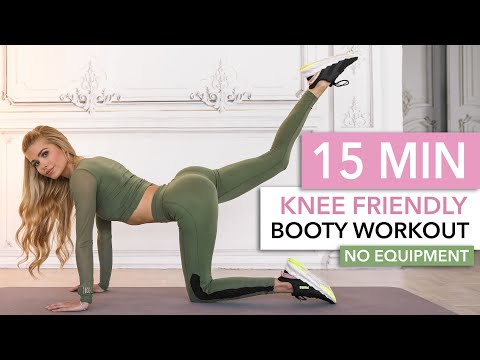

In [ ]:
# This is the video we're going to process
from IPython.display import YouTubeVideo, display
youtube_id = "p-uUnrCdhR8"
youtube_link = "https://www.youtube.com/watch?v=" + youtube_id
video = YouTubeVideo(youtube_id, width=500)
display(video)

In [ ]:
# Install dependencies, download the video, and crop 10 seconds for processing
!pip install youtube-dl
!youtube-dl $youtube_link -f 22 -o video.mp4
!ffmpeg -i video.mp4 -ss 00:03:28 -to 00:04:04 -c:v copy input.mp4

     |████████████████████████████████| 1.9MB 18.2MB/s 
[youtube] p-uUnrCdhR8: Downloading webpage
[youtube] p-uUnrCdhR8: Downloading player cb5bd7e6
[download] Destination: video.mp4
[download] 100% of 42.17MiB in 00:01
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --en

## Let's make it work with Google Colab

In [ ]:
!pip install pyyaml==5.1
!gcc --version

!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
!pip install torch==1.7.1 torchvision==0.8.2

import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

     |████████████████████████████████| 276kB 16.3MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44074 sha256=8f23b63ae9254041000638c829e96195b28607924b74133b0741b61fcfa915b1
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
     |████████████████████████████████| 6.0MB 648kB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210317-cp37-none-any.whl size=58543 

## In case of problems - uncomment and run this part

To avoid some technical issues we have to uninstall some libraries first (like in official tutorial)

In [ ]:
# !pip uninstall opencv-python opencv-python-headless opencv-contrib-python

In my case Google Colab after that couldn't import cv2 module (python3-opencv was installed). I fixed it by installing opencv-python library. 

In [ ]:
# !pip install opencv-python-headless opencv-contrib-python
# !pip install opencv-python

**Restart**

In [ ]:
# !apt install python3-opencv

## Install Detectron2

In [ ]:
# Run frame-by-frame inference demo on this video (takes 3-4 minutes) with the "demo.py" tool we provided in the repo.
!git clone https://github.com/facebookresearch/detectron2

Cloning into 'detectron2'...
remote: Enumerating objects: 11964, done.
remote: Counting objects: 100% (627/627), done.
remote: Compressing objects: 100% (300/300), done.
remote: Total 11964 (delta 346), reused 573 (delta 324), pack-reused 11337
Receiving objects: 100% (11964/11964), 4.87 MiB | 26.82 MiB/s, done.
Resolving deltas: 100% (8624/8624), done.


This is another issue I encountered. The module could not work with mp4 extension due to the license limitations. To avoid this we need change one line in the code of demo.py file.

Reference: https://www.swiftlane.com/blog/generating-mp4s-using-opencv-python-with-the-avc1-codec/

In [ ]:
!grep -rl "fourcc=cv2.VideoWriter_fourcc" /content/detectron2/demo/demo.py | xargs sed -i 's/x264/mp4v/g'

In [ ]:
# !cat "fourcc=cv2.VideoWriter_fourcc" /content/detectron2/demo/demo.py

## COCO Person Keypoint Detection

### Choose a model for the inference

<!--
./gen_html_table.py --config 'COCO-Keypoints/*50*' 'COCO-Keypoints/*101*'  --name R50-FPN R50-FPN R101-FPN X101-FPN --fields lr_sched train_speed inference_speed mem box_AP keypoint_AP
-->


<table><tbody>
<!-- START TABLE -->
<!-- TABLE HEADER -->
<th valign="bottom">Name</th>
<th valign="bottom">lr<br/>sched</th>
<th valign="bottom">train<br/>time<br/>(s/iter)</th>
<th valign="bottom">inference<br/>time<br/>(s/im)</th>
<th valign="bottom">train<br/>mem<br/>(GB)</th>
<th valign="bottom">box<br/>AP</th>
<th valign="bottom">kp.<br/>AP</th>
<th valign="bottom">model id</th>
<th valign="bottom">download</th>
<!-- TABLE BODY -->
<!-- ROW: keypoint_rcnn_R_50_FPN_1x -->
 <tr><td align="left"><a href="configs/COCO-Keypoints/keypoint_rcnn_R_50_FPN_1x.yaml">R50-FPN</a></td>
<td align="center">1x</td>
<td align="center">0.315</td>
<td align="center">0.072</td>
<td align="center">5.0</td>
<td align="center">53.6</td>
<td align="center">64.0</td>
<td align="center">137261548</td>
<td align="center"><a href="https://dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_R_50_FPN_1x/137261548/model_final_04e291.pkl">model</a>&nbsp;|&nbsp;<a href="https://dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_R_50_FPN_1x/137261548/metrics.json">metrics</a></td>
</tr>
<!-- ROW: keypoint_rcnn_R_50_FPN_3x -->
 <tr><td align="left"><a href="configs/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml">R50-FPN</a></td>
<td align="center">3x</td>
<td align="center">0.316</td>
<td align="center">0.066</td>
<td align="center">5.0</td>
<td align="center">55.4</td>
<td align="center">65.5</td>
<td align="center">137849621</td>
<td align="center"><a href="https://dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl">model</a>&nbsp;|&nbsp;<a href="https://dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/metrics.json">metrics</a></td>
</tr>
<!-- ROW: keypoint_rcnn_R_101_FPN_3x -->
 <tr><td align="left"><a href="configs/COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml">R101-FPN</a></td>
<td align="center">3x</td>
<td align="center">0.390</td>
<td align="center">0.076</td>
<td align="center">6.1</td>
<td align="center">56.4</td>
<td align="center">66.1</td>
<td align="center">138363331</td>
<td align="center"><a href="https://dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x/138363331/model_final_997cc7.pkl">model</a>&nbsp;|&nbsp;<a href="https://dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x/138363331/metrics.json">metrics</a></td>
</tr>
<!-- ROW: keypoint_rcnn_X_101_32x8d_FPN_3x -->
 <tr><td align="left"><a href="configs/COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml">X101-FPN</a></td>
<td align="center">3x</td>
<td align="center">0.738</td>
<td align="center">0.121</td>
<td align="center">8.7</td>
<td align="center">57.3</td>
<td align="center">66.0</td>
<td align="center">139686956</td>
<td align="center"><a href="https://dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x/139686956/model_final_5ad38f.pkl">model</a>&nbsp;|&nbsp;<a href="https://dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x/139686956/metrics.json">metrics</a></td>
</tr>
</tbody></table>

In [ ]:
##@title ##Choose model for the inference { run: "auto" }
from IPython.display import Markdown, display

def printmd(string):
  display(Markdown(string))

model = 'COCO-Keypoints/keypoint_rcnn_R_50_FPN_1x.yaml' #@param ["COCO-Keypoints/keypoint_rcnn_R_50_FPN_1x.yaml", "COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml", "COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml", "COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml"]
idx = ["COCO-Keypoints/keypoint_rcnn_R_50_FPN_1x.yaml", "COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml", "COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x.yaml", "COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x.yaml"].index(model)
printmd(f"##**Model** {idx}")
print(model)

model_files = {0:"https://dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_R_50_FPN_1x/137261548/model_final_04e291.pkl",
               1:"https://dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x/137849621/model_final_a6e10b.pkl",
               2:"https://dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_R_101_FPN_3x/138363331/model_final_997cc7.pkl",
               3:"https://dl.fbaipublicfiles.com/detectron2/COCO-Keypoints/keypoint_rcnn_X_101_32x8d_FPN_3x/139686956/model_final_5ad38f.pkl"}

model_file = model_files[idx].replace("https://dl.fbaipublicfiles.com/detectron2", "detectron2:/")
printmd(f"\n##**Model file**")
print(model_file)

##**Model** 0

COCO-Keypoints/keypoint_rcnn_R_50_FPN_1x.yaml



##**Model file**

detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_1x/137261548/model_final_04e291.pkl


### Run the inference

In [ ]:
! echo $model_file
! python detectron2/demo/demo.py --config-file detectron2/configs/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml --video-input input.mp4 --confidence-threshold 0.7 --output video-output.mp4 \
--opts MODEL.WEIGHTS $model_file

detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_1x/137261548/model_final_04e291.pkl
[04/28 20:10:30 detectron2]: Arguments: Namespace(confidence_threshold=0.7, config_file='detectron2/configs/COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml', input=None, opts=['MODEL.WEIGHTS', 'detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_1x/137261548/model_final_04e291.pkl'], output='video-output.mp4', video_input='input.mp4', webcam=False)
[04/28 20:10:34 fvcore.common.checkpoint]: Loading checkpoint from detectron2://COCO-Keypoints/keypoint_rcnn_R_50_FPN_1x/137261548/model_final_04e291.pkl
model_final_04e291.pkl: 237MB [00:11, 21.2MB/s]               
[04/28 20:10:45 fvcore.common.checkpoint]: Reading a file from 'Detectron2 Model Zoo'
  0% 0/853 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/detectron2/modeling/roi_heads/fast_rcnn.py:154: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (

## Output example

We will use 5 sec of the video to show the output example in colab

In [ ]:
!ffmpeg -i video-output.mp4 -t 5 -c copy output.mp4

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = "/content/output.mp4"
# Compressed video path
compressed_path = "/content/output_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)